## Spark: устройство, архитектура, контекст применения, основные термины

- ***Apache Spark*** — это оpen source фреймворк для распределенной обработки
больших данных
- поддерживает неструктурированные, слабоструктурированные, структурированные данные, что делает его универсальным инструментом для работы с большими данными
- пришёл на замену mapreduce
- предоставляет api для java, scala, python, r
- поддерживает sql

Apache Spark состоит из следующих блоков:
* Spark Core API. Включает языки R, SQL, Python, Scala и Java.
* Spark SQL + DataFrames. Содержит основную функциональность по обработке данных.
* Streaming. Предоставляет высокоуровневый АРІ для обработки потоковых данных в режиме реального времени.
* MLlib. Отвечает за машинное обучение.
* GraphX. Предназначен для графовых вычислений.

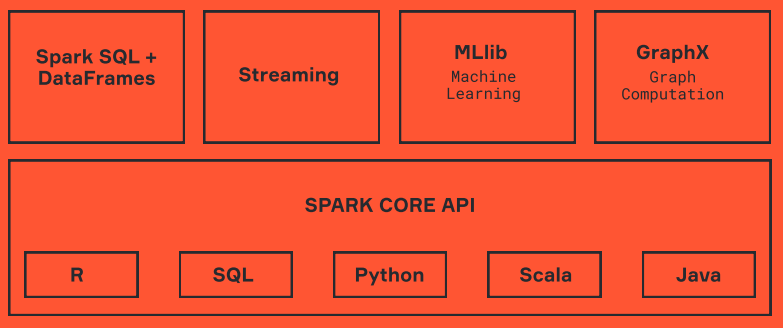

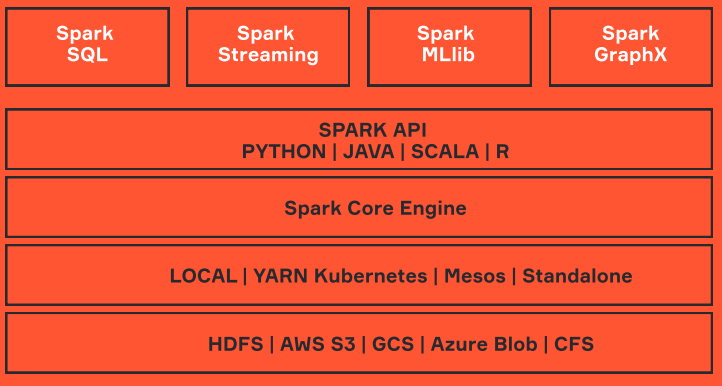

Чаще всего Spark встречается в составе Hadoop-кластеров. 

***Hadoop*** - это распределенная система, состоящая из множества серверов, среди которых
можно выделить две основные роли внутри кластера:
1. Name Node. Это управляющий сервер, отвечающий за организацию
распределения различных данных.
2. Data Node. При запуске Spark на данных серверах происходит работа
инстансов. Помните, что ресурсы каждого сервера Data Node ограничены
числом ядер и оперативной памятью.

### Основные концепции Spark
- Cluster - группа серверов (виртуальных машин), на которых установлен Spark.
- Cluster Manager — внешний процесс, сервис, приложение, отвечающее за выделение ресурсов на кластере (Standalone, Yarn, Kubernetes)
- Driver - основной процесс, выступающий в роли Мастера, главного управляющего процесса в Spark-приложении. Это instance software, который запускается и работает на сервере. Driver создает SparkContext.
- SparkContext (SparkSession) - в отличие от Driver, это логическая абстракция, объект внутри приложения Spark, обеспечивающая взаимодействие с кластером. Отвечает за доставку кода и Tasks на Executors.
- Worker Node — сервер или виртуальная машина, на которой запускается Executor. В архитектуре Hadoop-кластера роль Worker Node выполняет Data Node.
- Executor — процесс, запущенный на Worker Node и выполняющий Tasks.
- Tasks - минимальный объем работы в Spark: одна операция, выполняемая над одной Partition одним Executor.
- Partition — минимальный логический объем данных, над которыми проводятся вычисления.
- Job - набор/последовательность Stages, создаваемая в результате вызова
Action.
- Stage - набор/последовательность Tasks, которые могут быть выполнены
параллельно, без необходимости Shuffle.
- Shuffle - операция, в ходе которой данные репартиционируются в кластере. Данные пересылаются по сети. Одна из самых ресурсоемких и медленных операций.
- Application — приложение Spark, состоит из Driver- и Executor- процессов в
кластере.
- Deploy Mode — отвечает за расположение Driver процесса. Может находиться
внутри кластера (cluster mode) или снаружи (client-mode), например, на
компьютере пользователя, который производит запуск приложения.
- Action - команда, которая должна вернуть результат после серии Transformations.

Основные концепции Spark можно представить в виде иерархии. Здесь важно
усвоить последовательность Job - Stage - Task.

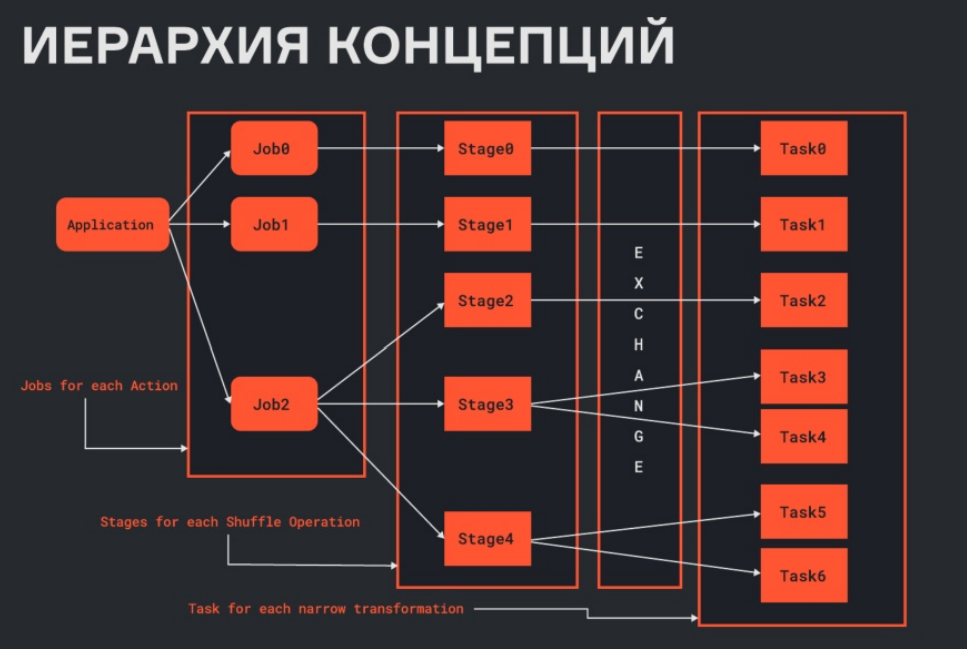

### Архитектура Spark

Архитектура Spark представляет собой распределенную систему, в которой
каждый компонент находится в постоянном взаимодействии с другими
компонентами по сети.

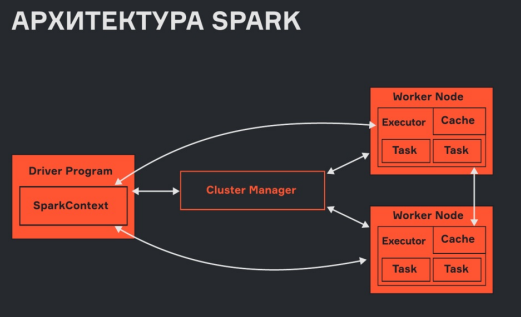

В начале работы Spark-приложения первой запускается Driver Program. Она
запрашивает у Cluster Manager CPU и RAM и узнает, на каких Worker Node
возможен запуск Executor'oв.
Далее ***Driver Program*** управляет жизненным циклом приложения:
* запрашивает ресурсы у Cluster Manager
* распределяет задачи между executors
* реагирует на падение worker node или executor
* возвращает ответ/результат пользователю
* создает SparkContext
* собирает и отправляет в webui метаданные приложения

***Executor***
* выполняет tasks, назначенные Driver Program
* возвращает информацию о статусе и прогрессе на Driver Program, чтобы Driver Program мог дальше

### Основные структуры данных Spark
Существуют три основные структуры данных в Араche Spark:
1. RDD (Resilient Distributed Dataset) — АРІ самого низкого уровня для работы с
данными в Spark, распределенная коллекция данных (данные, поделенные на
partitions, что позволяет обрабатывать данные параллельно) 
2. Dataframe — распределенная коллекция данных. Данные распределены в
колонки, наподобие таблицы в базе данных или Рandas DataFrame.
3. Dataset — типизированный Data Frame. Поддерживается в Scala и Java и не
поддерживается в Python.

### Основные виды трансформаций в Spark
1. Narrow Transformations - не требуют пересылки данных по сети. Из одной
partition получается одна partition.
2. Wide Transformations - из одной partition может получиться большее
количество partitions, требуется пересылка данных из одной partition и
группировка их с данными из другой.

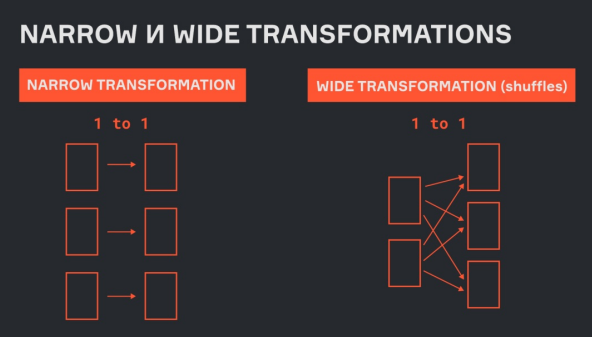

### Принцип Lazy Evaluation
Внутри Арache Spark действует принцип Lazy Evaluation или «ленивые
вычисления». Это означает, что:
* пока пишется код, Spark ждет до последнего момента, прежде чем начать вычисления
* вычисления начинаются после вызова action
* Spark строит план выполнения на основе заданных пользователем transformations
* в ходе построения плана Spark пытается оптимизировать вычисления